In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [97]:
_df = pd.read_csv("fraudTrain.csv")

In [98]:
cus_list = set(_df.query('is_fraud==1').cc_num.tolist())
_df2 = _df.query("cc_num in @ cus_list")
_df2 = _df2.assign(time= list(map(lambda x: int(x.split(' ')[-1].split(':')[0]), _df2['trans_date_trans_time'])))

In [99]:
_df2.shape

(651430, 24)

In [18]:
_df2.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'time'],
      dtype='object')

In [19]:
_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651430 entries, 3 to 1048574
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             651430 non-null  int64  
 1   trans_date_trans_time  651430 non-null  object 
 2   cc_num                 651430 non-null  float64
 3   merchant               651430 non-null  object 
 4   category               651430 non-null  object 
 5   amt                    651430 non-null  float64
 6   first                  651430 non-null  object 
 7   last                   651430 non-null  object 
 8   gender                 651430 non-null  object 
 9   street                 651430 non-null  object 
 10  city                   651430 non-null  object 
 11  state                  651430 non-null  object 
 12  zip                    651430 non-null  int64  
 13  lat                    651430 non-null  float64
 14  long                   651430 non-n

In [20]:
_df2["is_fraud"].value_counts()

0    645424
1      6006
Name: is_fraud, dtype: int64

In [21]:
_df2["is_fraud"].value_counts()/len(_df2)

0    0.99078
1    0.00922
Name: is_fraud, dtype: float64

In [22]:
_df2.groupby(by=['is_fraud']).agg({'city_pop':np.mean,'amt':np.mean,'time':np.mean})

,city_pop,amt,time
is_fraud,,,
0,83870.443845,67.743047,12.813152
1,96323.951715,530.573492,13.915917


In [25]:
_df2.groupby(by=['category']).agg({'is_fraud':np.mean})

,is_fraud
category,
entertainment,0.003907
food_dining,0.002628
gas_transport,0.007570
grocery_net,0.004802
grocery_pos,0.022539
health_fitness,0.002408
home,0.002488
kids_pets,0.003440
misc_net,0.023023


<Axes: xlabel='time'>

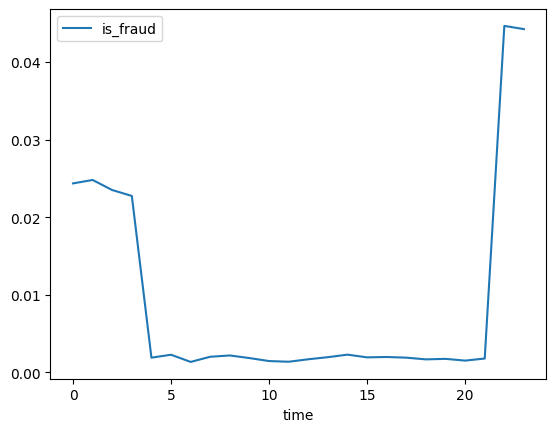

In [26]:
_df2.groupby(by=['time']).agg({'is_fraud':np.mean}).plot()

- 그래프상 시간을 3등분 하거나 2등분 해서 적합시키면 좋을 거 같다.

- 1) 3등분: 20 ~ 04, 04 ~ 12, 12 ~ 20

- 2) 2등분: 06 ~ 18, 18 ~ 06

- 사기거래와 사기거래가 아닌 그룹에서 데이터 범주가 차이가 나는걸 보면
 
    금액, 시간..

In [28]:
_df3=_df2[['amt','time','category','is_fraud']]
_df3

,amt,time,category,is_fraud
3,45.00,0,gas_transport,0
5,94.63,0,gas_transport,0
6,44.54,0,grocery_net,0
7,71.65,0,gas_transport,0
8,4.27,0,misc_pos,0
...,...,...,...,...
1048567,39.96,16,kids_pets,0
1048568,20.67,16,entertainment,0
1048569,6.03,16,food_dining,0
1048571,116.94,16,misc_pos,0


In [40]:
_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651430 entries, 3 to 1048574
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   amt       651430 non-null  float64
 1   time      651430 non-null  int64  
 2   category  651430 non-null  object 
 3   is_fraud  651430 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 24.9+ MB


In [59]:
_df4=_df2[['amt','time','is_fraud']]
_df4

,amt,time,is_fraud
3,45.00,0,0
5,94.63,0,0
6,44.54,0,0
7,71.65,0,0
8,4.27,0,0
...,...,...,...
1048567,39.96,16,0
1048568,20.67,16,0
1048569,6.03,16,0
1048571,116.94,16,0


In [61]:
data=np.hstack([_df4.values[:,:]])

In [62]:
data

array([[ 45.  ,   0.  ,   0.  ],
       [ 94.63,   0.  ,   0.  ],
       [ 44.54,   0.  ,   0.  ],
       ...,
       [  6.03,  16.  ,   0.  ],
       [116.94,  16.  ,   0.  ],
       [  6.81,  16.  ,   0.  ]])

In [65]:
X = data[:,:-1]
y = data[:,-1]

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [102]:
lr = LogisticRegression()

In [103]:
lr.fit(X_train, y_train)

LogisticRegression()

In [104]:
y_pred=lr.predict(X_test)

In [115]:
acc= accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1score = f1_score(y_test, y_pred, average='weighted')
print("Accuracy: {:.6f}".format(acc))
print("Precision: {:.6f}".format(precision))
print("Recall: {:.6f}".format(recall))
print("F1 score: {:.6f}".format(f1score))

Accuracy: 0.051349
Precision: 0.005162
Recall: 0.051349
F1 score: 0.009370


/home/coco/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [130]:
acc= accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
print("Accuracy: {}".format(acc))
print("Precision:{}".format(precision))
print("Recall: {}".format(recall))
print("F1 score: {}".format(f1score))

Accuracy: 0.051348571604009643
Precision:0.004232713983377072
Recall: 0.04223025149824091
F1 score: 0.007685871263604649


/home/coco/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [131]:
acc= accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1score = f1_score(y_test, y_pred, average='micro')
print("Accuracy: {}".format(acc))
print("Precision:{}".format(precision))
print("Recall: {}".format(recall))
print("F1 score: {}".format(f1score))

Accuracy: 0.051348571604009643
Precision:0.051348571604009643
Recall: 0.051348571604009643
F1 score: 0.051348571604009643


`-` average 매개 변수

- None: 클래스별 metric 값을 계산

- micro: 모든 샘플을 하나의 그룹으로 취급하여 metric 값을 계산

- macro: 클래스별 metric 값을 동일한 가중치로 더하여 산술평균을 계산

- weighted: 클래스별 metric 값을 라벨 수로 가중 평균하여 계산

- samples: 샘플마다 metric 값을 계산